In [42]:
import pandas as pd
import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import dummy
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
          
import matplotlib.pyplot as plt                   
import seaborn as sns
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics




 How many instances has the data set? 1797

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

How many classes (type of digits) have the data set? 10

In [67]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

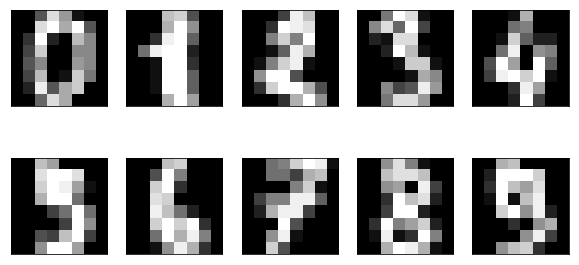

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


DATA FRAME????

# EXERCISE 2


1. Normalize the data using a MinMaxScaler. Then implement a k-Means model using a random seed = 4 and k equal to the number of classes you found from previous exercise.


In [163]:
X = digits.data
y = digits.target

In [164]:
scaler = MinMaxScaler()

In [178]:
X_scaled = scaler.fit_transform(X)

In [179]:
X_scaled = pd.DataFrame(db_scaled)

In [180]:
X_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.037980,0.325299,0.739740,0.740505,0.361366,0.085142,0.008644,0.002782,0.124617,...,0.232819,0.015881,0.000556,0.031039,0.347350,0.755565,0.738070,0.422753,0.129243,0.022781
std,0.0,0.113399,0.297177,0.265553,0.267962,0.354151,0.207861,0.069159,0.047111,0.199760,...,0.307463,0.075723,0.023590,0.103811,0.318939,0.273418,0.308372,0.368789,0.255659,0.116258
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.062500,0.625000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687500,0.625000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.250000,0.812500,0.812500,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.250000,0.812500,0.875000,0.375000,0.000000,0.000000
75%,0.0,0.000000,0.562500,0.937500,0.937500,0.687500,0.000000,0.000000,0.000000,0.187500,...,0.437500,0.000000,0.000000,0.000000,0.625000,1.000000,1.000000,0.750000,0.125000,0.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [181]:
kmeans = KMeans(init= 'random',n_clusters=10, random_state= 4)

In [182]:
clusters_labels = kmeans.fit_predict(X_scaled)
kmeans.cluster_centers_.shape

(10, 64)

In [183]:
print (kmeans.labels_)

[1 6 6 ..., 6 3 3]


In [184]:
kmeans_labels = pd.DataFrame(kmeans.labels_)

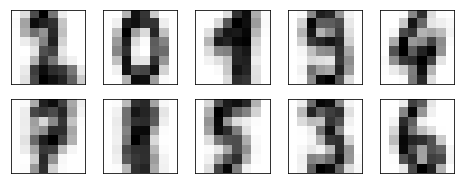

In [185]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers ):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center , interpolation='nearest', cmap=plt.cm.binary)

In [186]:
from scipy . stats import mode

In [187]:
labels = np.zeros_like(clusters_labels)
for i in range (10):
    mask = ( clusters_labels == i )
    labels[mask] = mode(digits.target[mask])[0]

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79020589872008906

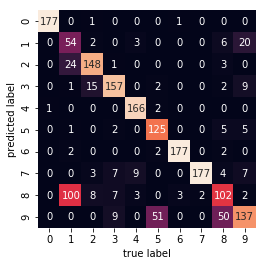

In [189]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Exercise 3

Implement a dendrogram for the digits data set. How many clusters seem to be suggested? Implement a HAC for each number of clusters you think it may be reasonable to try given the dendrogram. Compute the accuracy, as you did previously, for each model and compare the values.

In [190]:
from scipy.cluster.hierarchy import dendrogram, ward

In [191]:
linkage_array = ward(X_scaled)

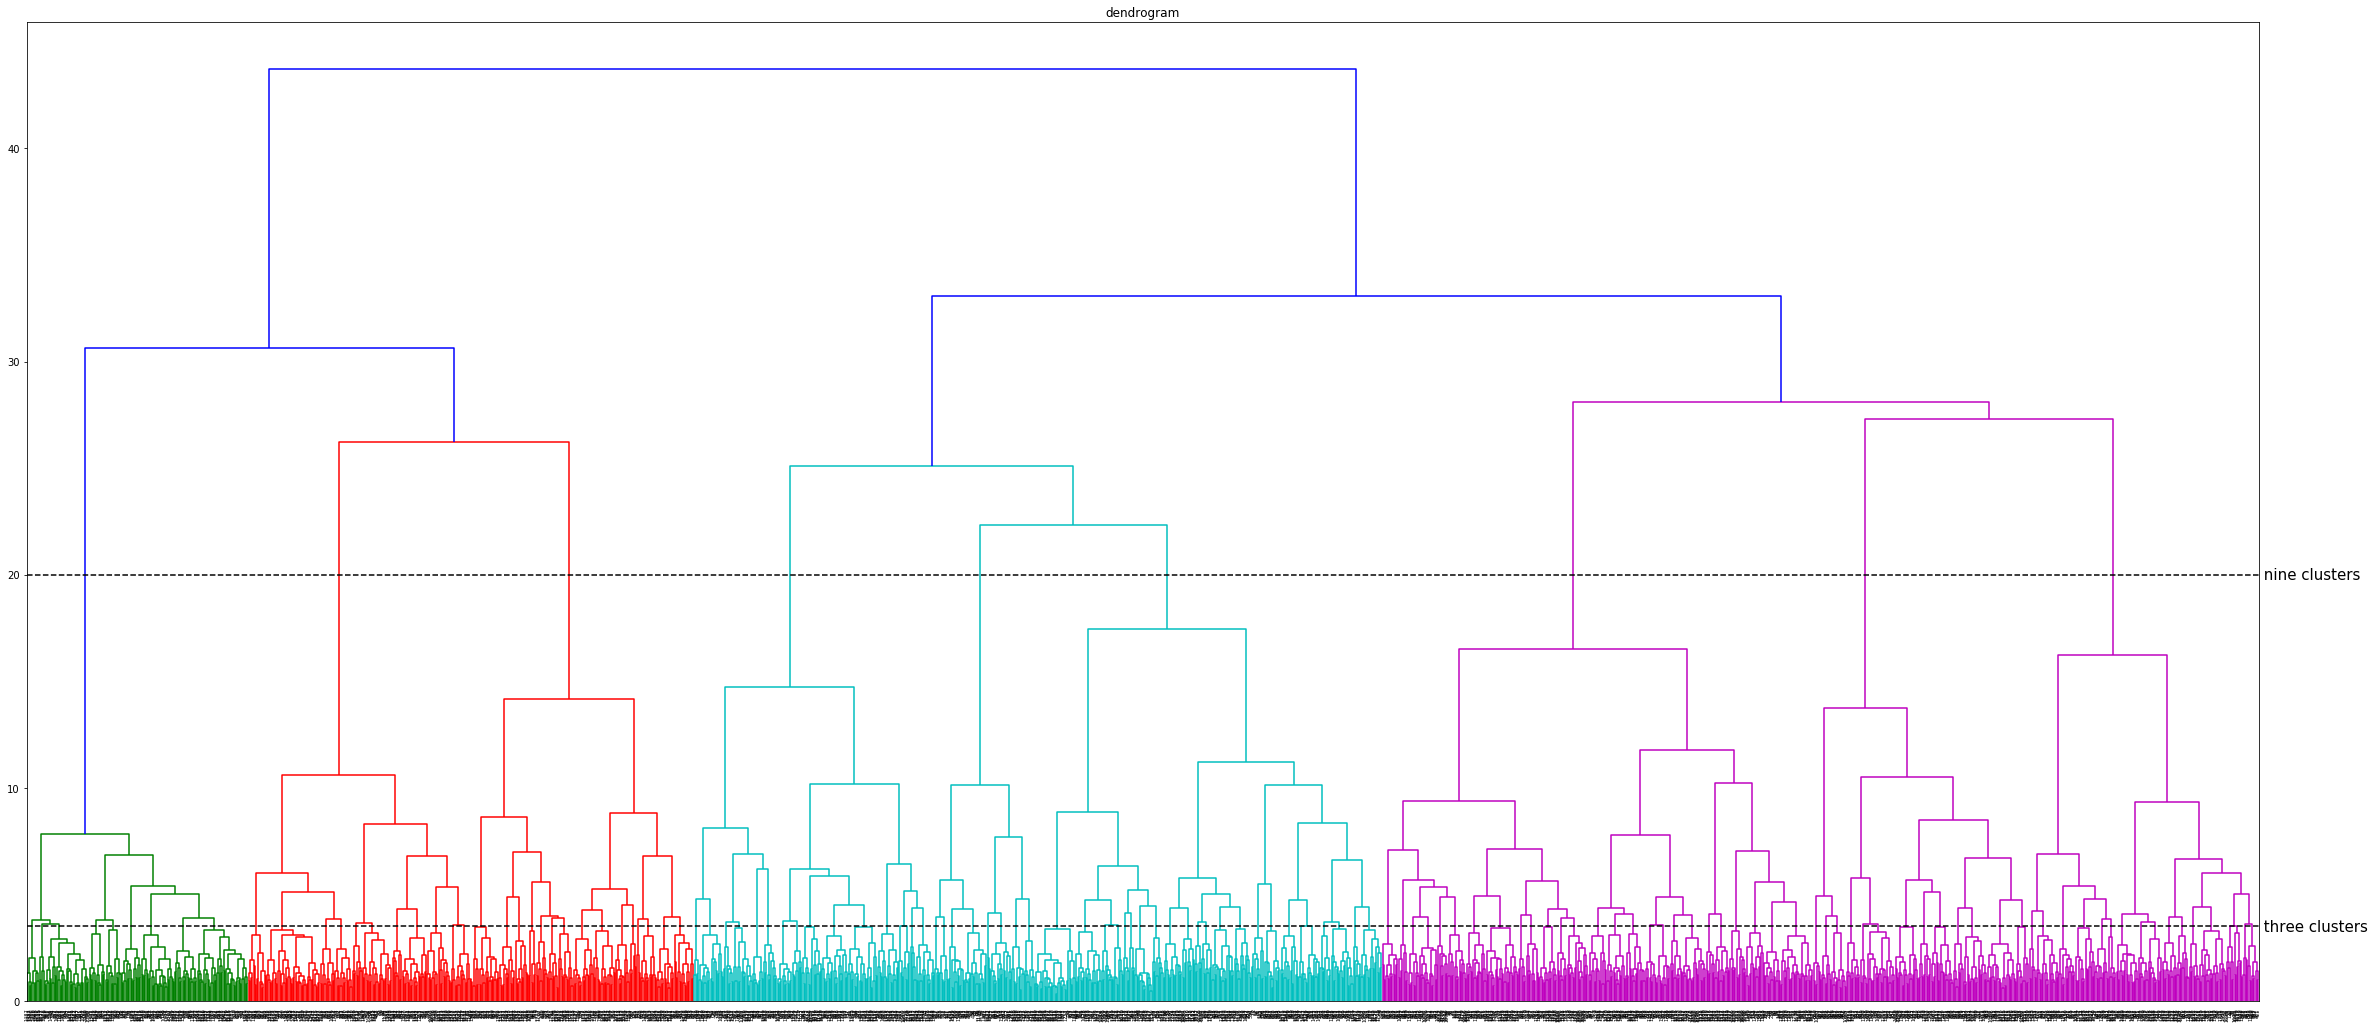

In [200]:
dendrogram(linkage_array);
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [20, 20], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 20, ' nine clusters', verticalalignment='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', verticalalignment='center', fontdict={'size': 15})
plt.title("dendrogram")
plt.rcParams['figure.figsize']= (40, 18)